In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("C:/Users/adib-/Downloads/housing.csv",delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [4]:
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isna().sum() #No Null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# Only these two variable are categorical in nature
# df['CHAS'].unique()
df['RAD'].unique()


array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
    for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("%s outliers = %.2f%%" % (k, perc))

CRIM outliers = 13.04%
ZN outliers = 13.44%
INDUS outliers = 0.00%
CHAS outliers = 100.00%
NOX outliers = 0.00%
RM outliers = 5.93%
AGE outliers = 0.00%
DIS outliers = 0.99%
RAD outliers = 0.00%
TAX outliers = 0.00%
PTRATIO outliers = 2.96%
B outliers = 15.22%
LSTAT outliers = 1.38%
MEDV outliers = 7.91%


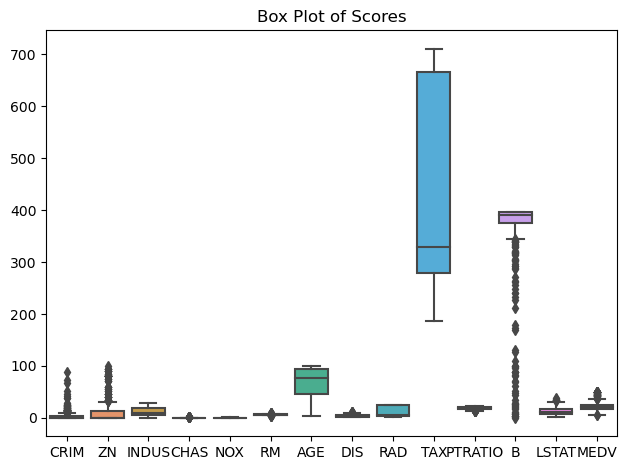

In [10]:
sns.boxplot(data=df).set(title="Box Plot of Scores")
plt.tight_layout()
plt.show()

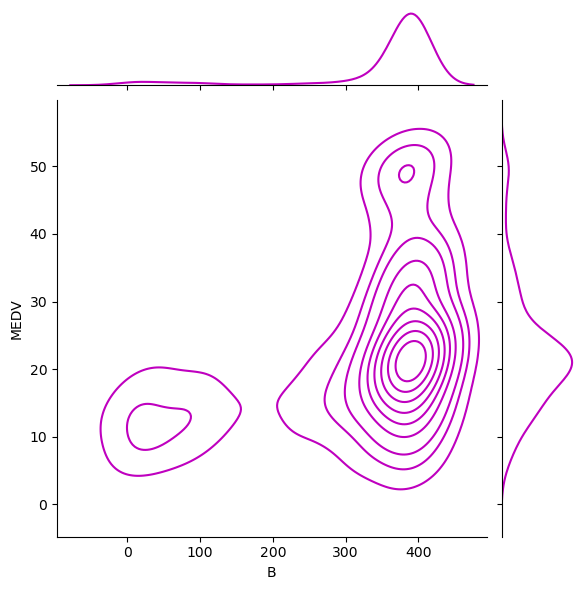

In [11]:
# Two way distribution & concentration of our dependent variable & TAX variable (X)
sns.jointplot(x='B',y='MEDV',data=df,kind='kde',color='m')
plt.show()

In [12]:
print('Hello')

Hello


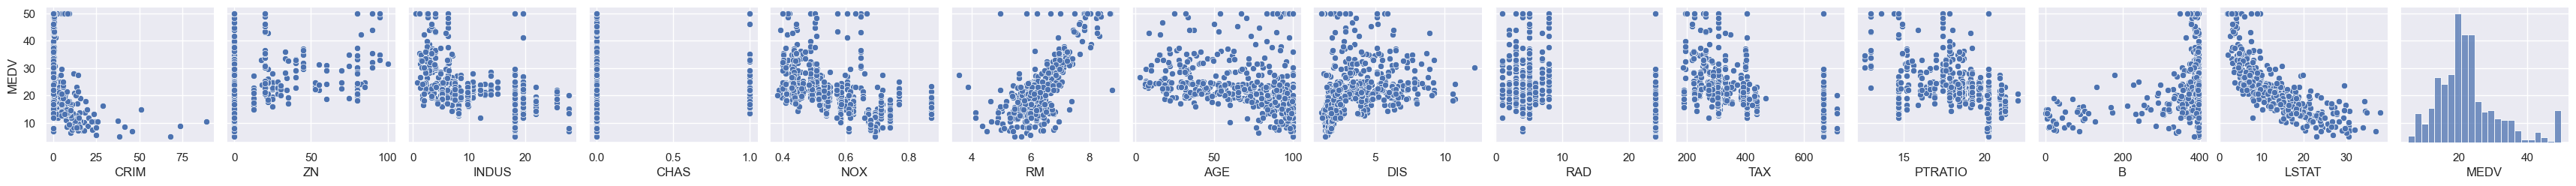

In [13]:
sns.set(rc={'figure.figsize':(20.7,18.27)})
sns.pairplot(df, x_vars=df.columns,y_vars=['MEDV'])





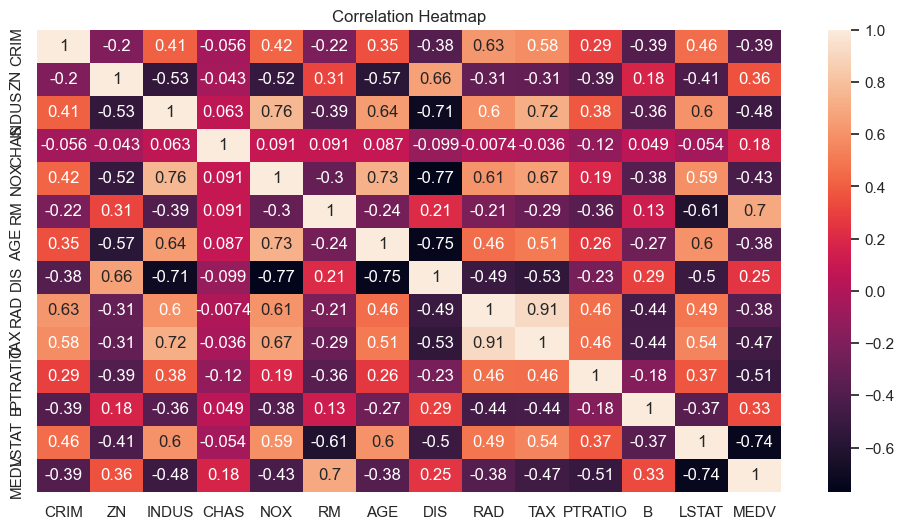

In [14]:
gcf=sns.heatmap(df.corr(),annot=True)

fig=plt.gcf()
fig.set_size_inches(12,6)
plt.title('Correlation Heatmap')
plt.show()

# Showing the correlation between each variables

In [15]:
X=df.drop(columns='MEDV')
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [16]:
y=df['MEDV']

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [18]:
scale_X=StandardScaler()
scale_y=StandardScaler()

X=scale_X.fit_transform(X)
y=scale_y.fit_transform(y.values.reshape(-1,1))

In [19]:
y.shape

(506, 1)

# Decision Tree Regressor

In [20]:
#Train-Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [21]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=3, random_state=1)
dtr.fit(X_train, y_train)
dtr.predict(X_test)

array([-0.05254742, -0.05254742, -0.61221014, -1.19441684, -0.05254742,
       -0.61221014,  1.18074244, -0.61221014, -0.05254742, -0.05254742,
        1.18074244, -0.05254742, -0.05254742, -1.19441684, -0.61221014,
        0.55893338,  2.48258839, -1.19441684, -0.05254742,  0.55893338,
       -1.19441684, -0.61221014, -0.05254742, -0.05254742,  2.48258839,
       -0.05254742, -0.05254742,  0.55893338, -0.61221014, -0.05254742,
       -0.61221014, -1.19441684, -0.05254742, -0.05254742,  0.55893338,
       -0.05254742, -0.05254742, -0.61221014,  0.55893338, -0.05254742,
       -1.19441684,  1.18074244, -0.05254742,  0.55893338, -1.19441684,
        1.18074244,  2.48258839, -0.05254742, -0.61221014, -0.05254742,
       -0.61221014,  2.48258839, -0.05254742, -0.05254742, -1.19441684,
       -0.61221014,  1.18074244,  0.55893338, -0.05254742, -0.05254742,
       -0.61221014, -1.19441684, -0.05254742, -0.61221014, -1.19441684,
       -0.05254742, -0.61221014,  0.55893338,  1.18074244, -1.19

In [22]:
from sklearn import tree

Text(0.5, 1.0, 'Decision Tree Regression Boston Housing\nMax Depth=3')

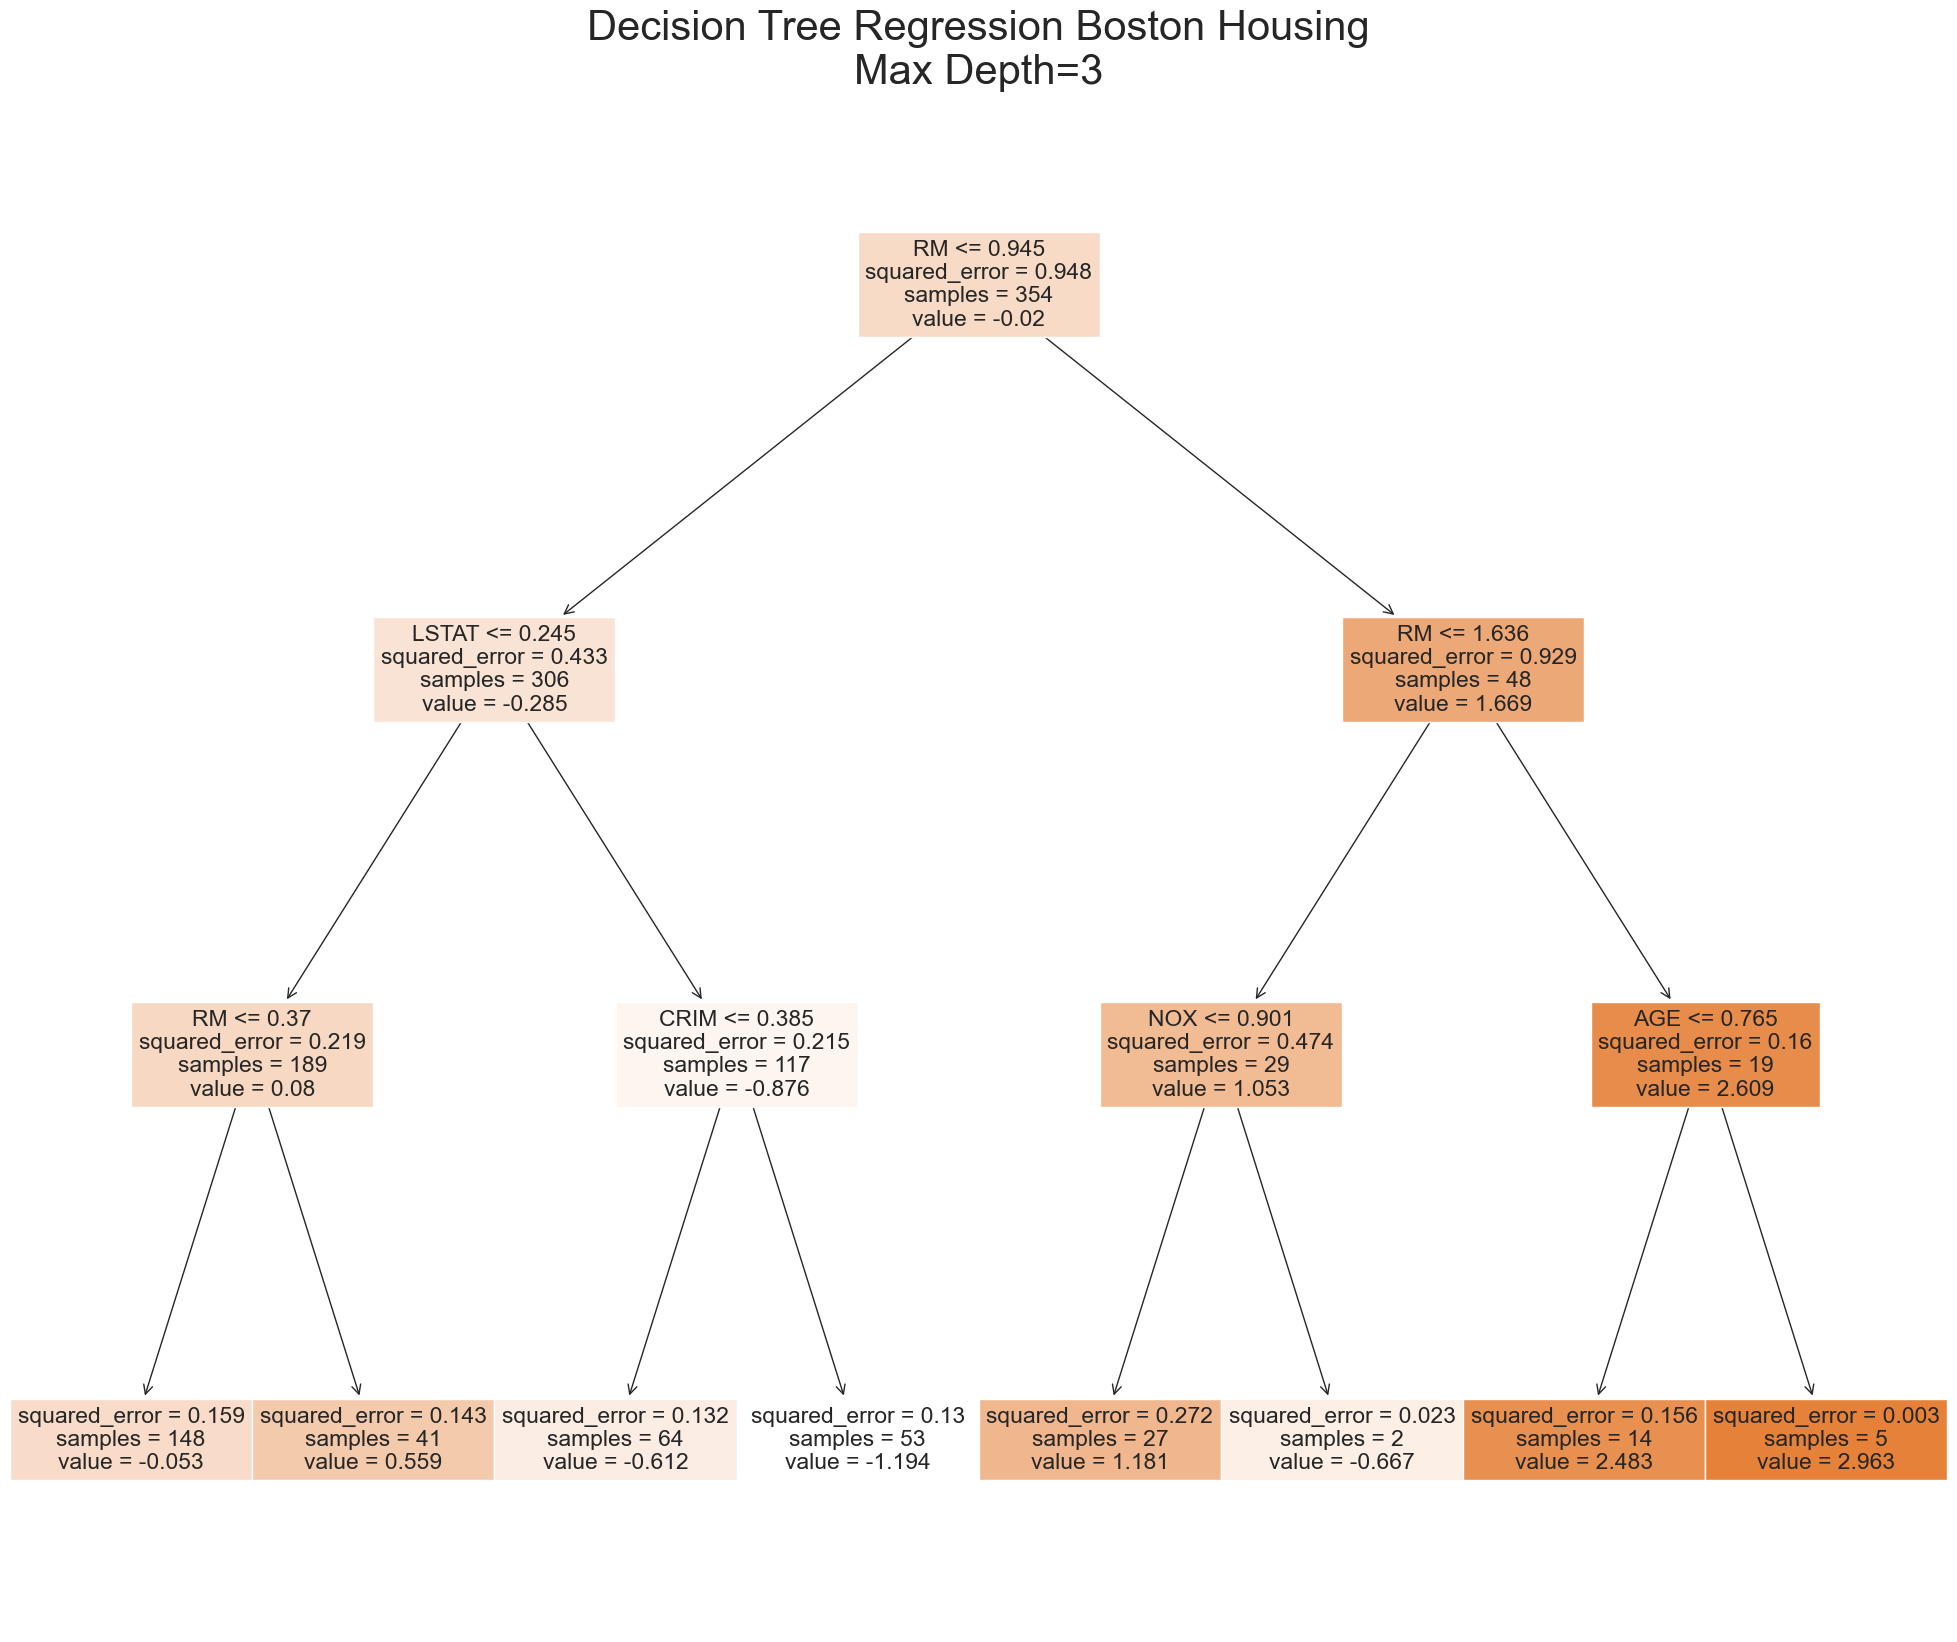

In [23]:
fig=plt.figure(figsize=(25,20))
tree.plot_tree(dtr,feature_names=df.columns, filled=True)
plt.title('Decision Tree Regression Boston Housing\nMax Depth=3',fontsize=30)

Text(0.5, 1.0, 'Decision Tree Regression Boston Housing\nNo Depth')

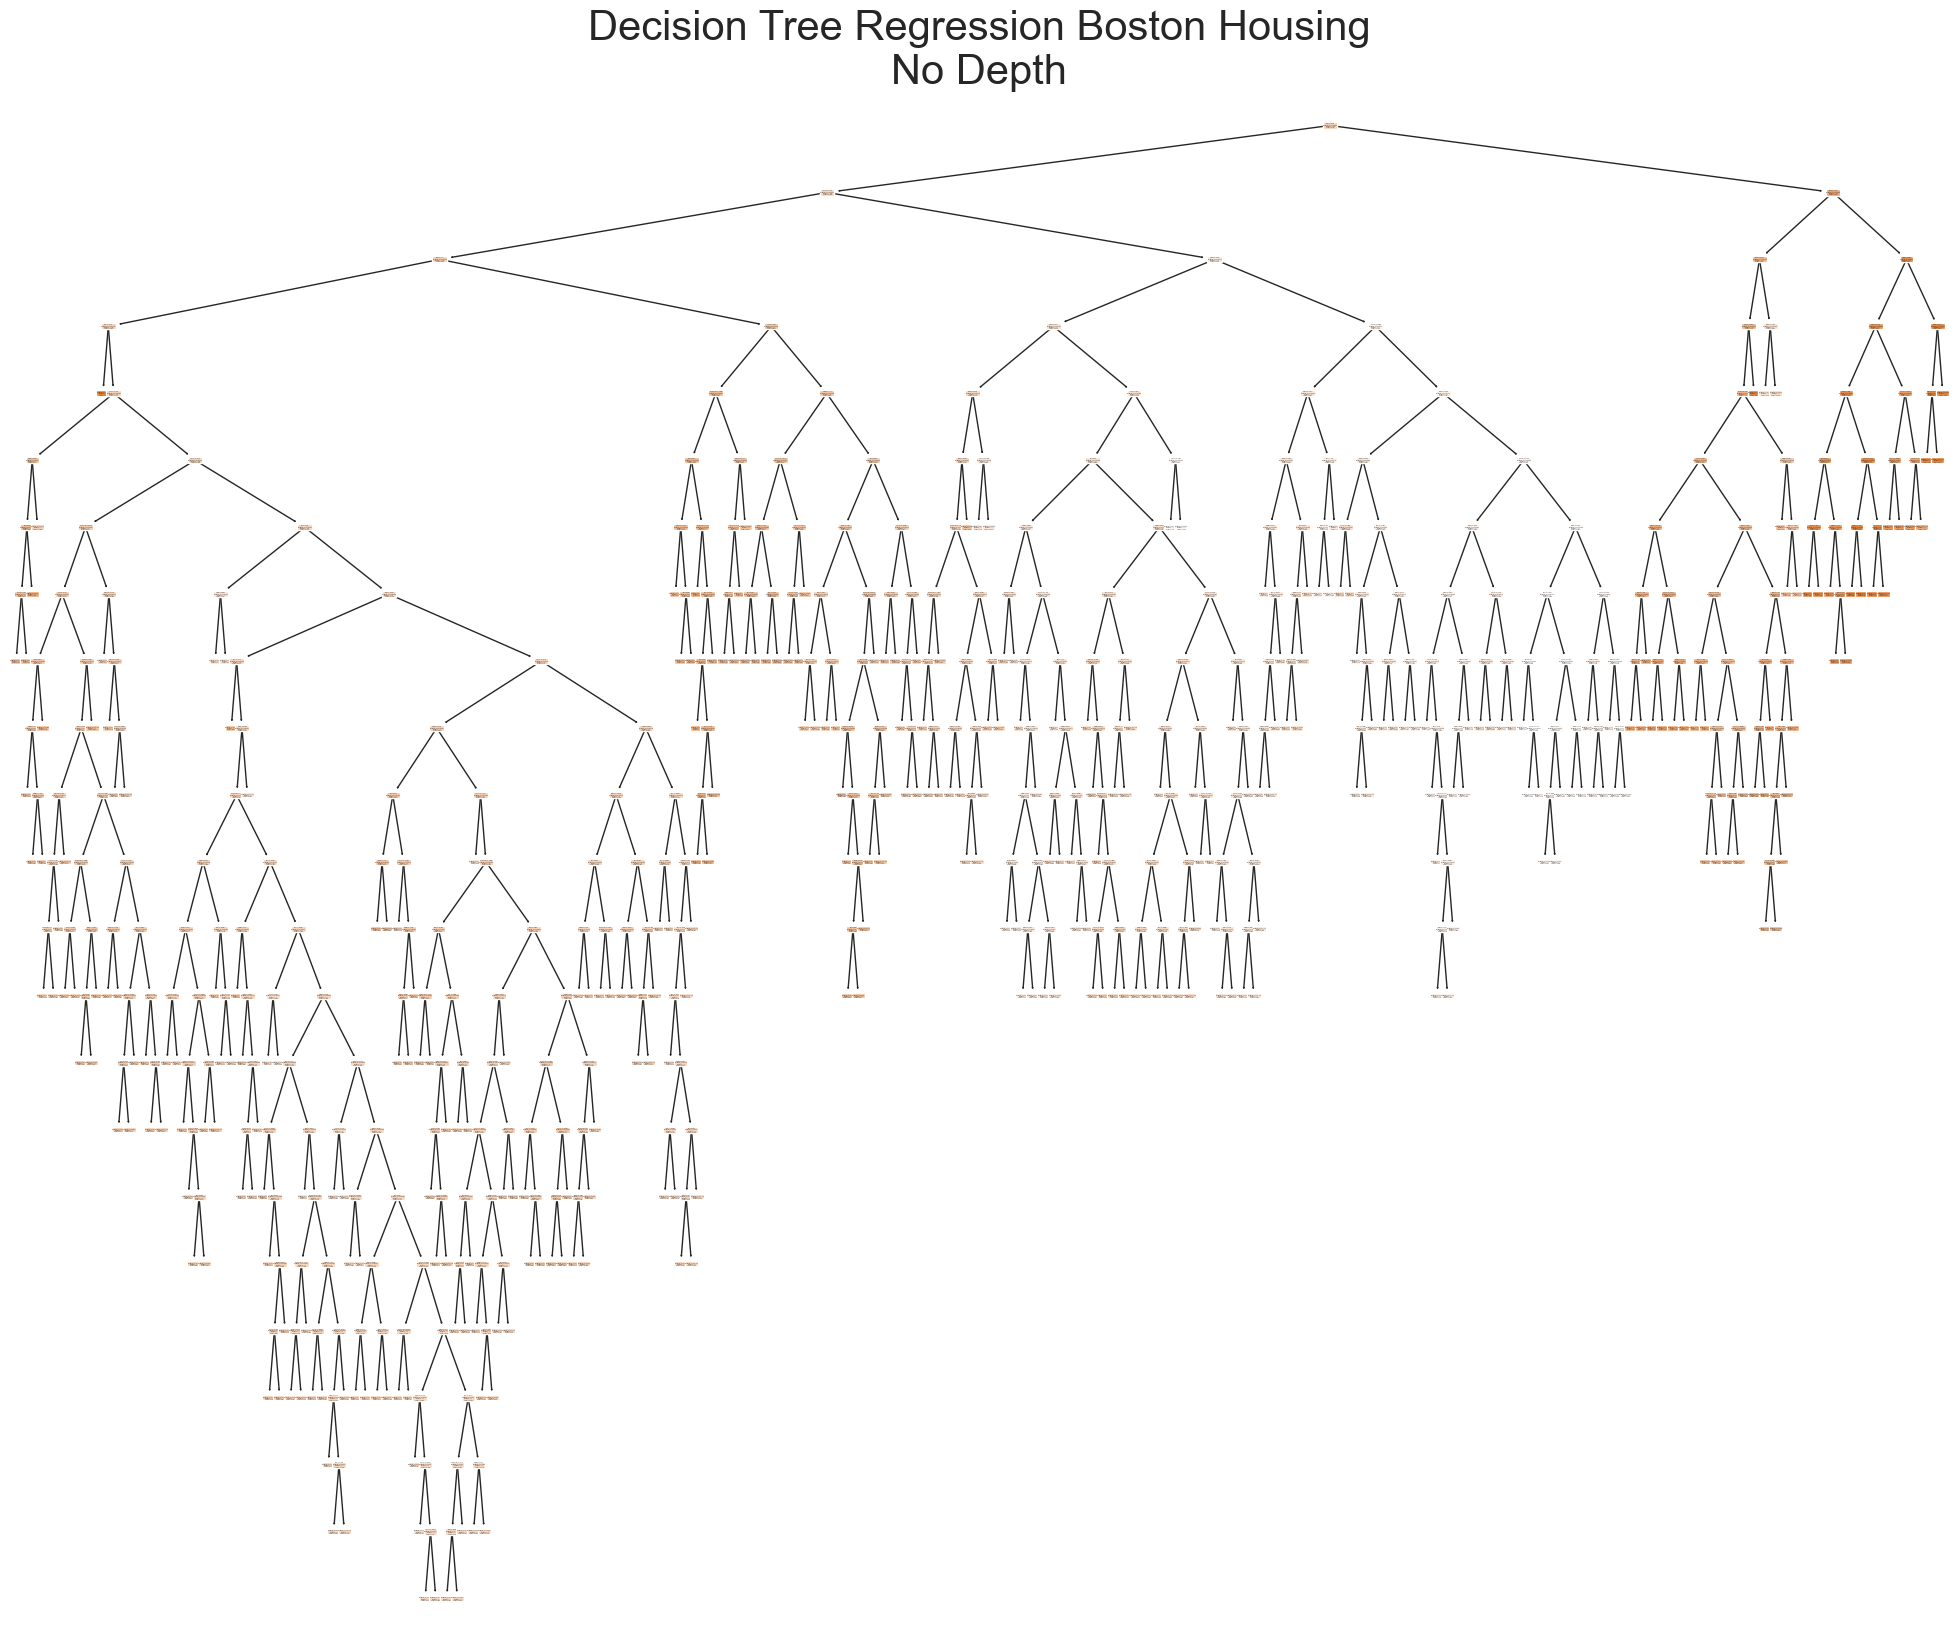

In [24]:
dtr1=DecisionTreeRegressor(random_state=1)
dtr1.fit(X_train, y_train)
dtr1.predict(X_test)
fig=plt.figure(figsize=(25,20))
tree.plot_tree(dtr1,feature_names=df.columns, filled=True)
plt.title('Decision Tree Regression Boston Housing\nNo Depth',fontsize=30)

In [25]:
from sklearn.neighbors import KNeighborsRegressor

accuracy_rate=[]
for i in range(1,20):
    neigh=KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train,y_train)
    neigh.predict(X_test)
    accuracy_rate.append(neigh.score(X_test,y_test))

In [26]:
accuracy_rate

[0.6681879309953926,
 0.78733222003996,
 0.7388068880669989,
 0.7230671497098097,
 0.6983838589411462,
 0.6743270374705248,
 0.6570875686893386,
 0.6523031717525044,
 0.6607472835045959,
 0.6592481320913133,
 0.6540737893478479,
 0.6523169070801258,
 0.643166197820072,
 0.6396108213566551,
 0.6345373469294278,
 0.6317957132724482,
 0.6237503374987032,
 0.622842926266308,
 0.6197157017231691]

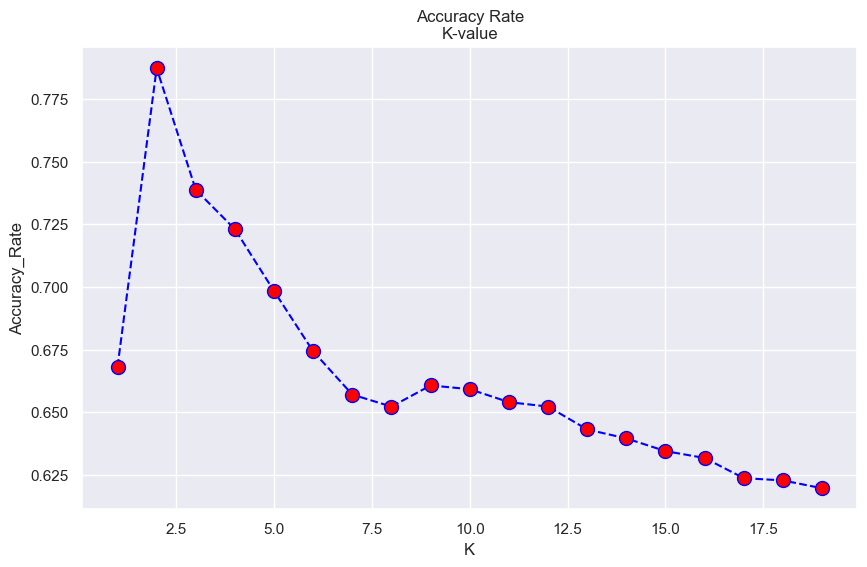

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate\nK-value')
plt.xlabel('K')
plt.ylabel('Accuracy_Rate')
plt.show()

In [28]:
accuracy_rate1=[]
for i in range(1,20):
    neigh1=KNeighborsRegressor(n_neighbors=i,weights='distance')
    neigh1.fit(X_train,y_train)
    neigh1.predict(X_test)
    accuracy_rate1.append(neigh1.score(X_test,y_test))

In [29]:
accuracy_rate1

[0.6681879309953926,
 0.7871305315033552,
 0.7534333524414669,
 0.7497485848479539,
 0.7381043223513051,
 0.7187020449341825,
 0.7039983450228459,
 0.7013634244985876,
 0.7035029072822322,
 0.7019732269763248,
 0.6965427053021055,
 0.6936576073235474,
 0.6868769685632128,
 0.684287843498449,
 0.6796563338317139,
 0.6773154365384861,
 0.6719990570743593,
 0.6715294215963101,
 0.6693357272599194]

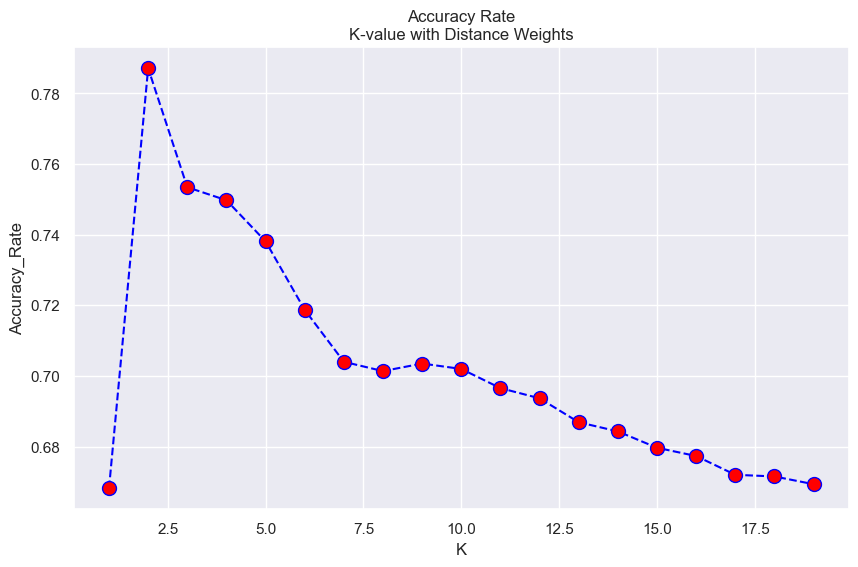

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy_rate1,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate\nK-value with Distance Weights')
plt.xlabel('K')
plt.ylabel('Accuracy_Rate')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
scores_knn=[]
scores_dtr=[]
scores_lr=[]

for train_index,test_index in kf.split(X):
    X_train,X_test,y_train,y_test=X[train_index],X[test_index],y[train_index],y[test_index]
    scores_knn.append(neigh.score(X_test,y_test))
    scores_dtr.append(dtr.score(X_test,y_test))
    scores_lr.append(lr.score(X_test,y_test))

In [34]:
df2=pd.DataFrame((scores_knn,scores_dtr,scores_lr),index=['KNN','DTR','LR'],columns=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5'])
df2

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
KNN,0.762788,0.677356,0.631986,0.462981,0.566328
DTR,0.749863,0.873708,0.851251,0.489089,0.360690
LR,0.747723,0.804748,0.771062,0.398507,0.413686


array([<AxesSubplot:title={'center':'Fold 1'}>,
       <AxesSubplot:title={'center':'Fold 2'}>,
       <AxesSubplot:title={'center':'Fold 3'}>,
       <AxesSubplot:title={'center':'Fold 4'}>,
       <AxesSubplot:title={'center':'Fold 5'}>], dtype=object)

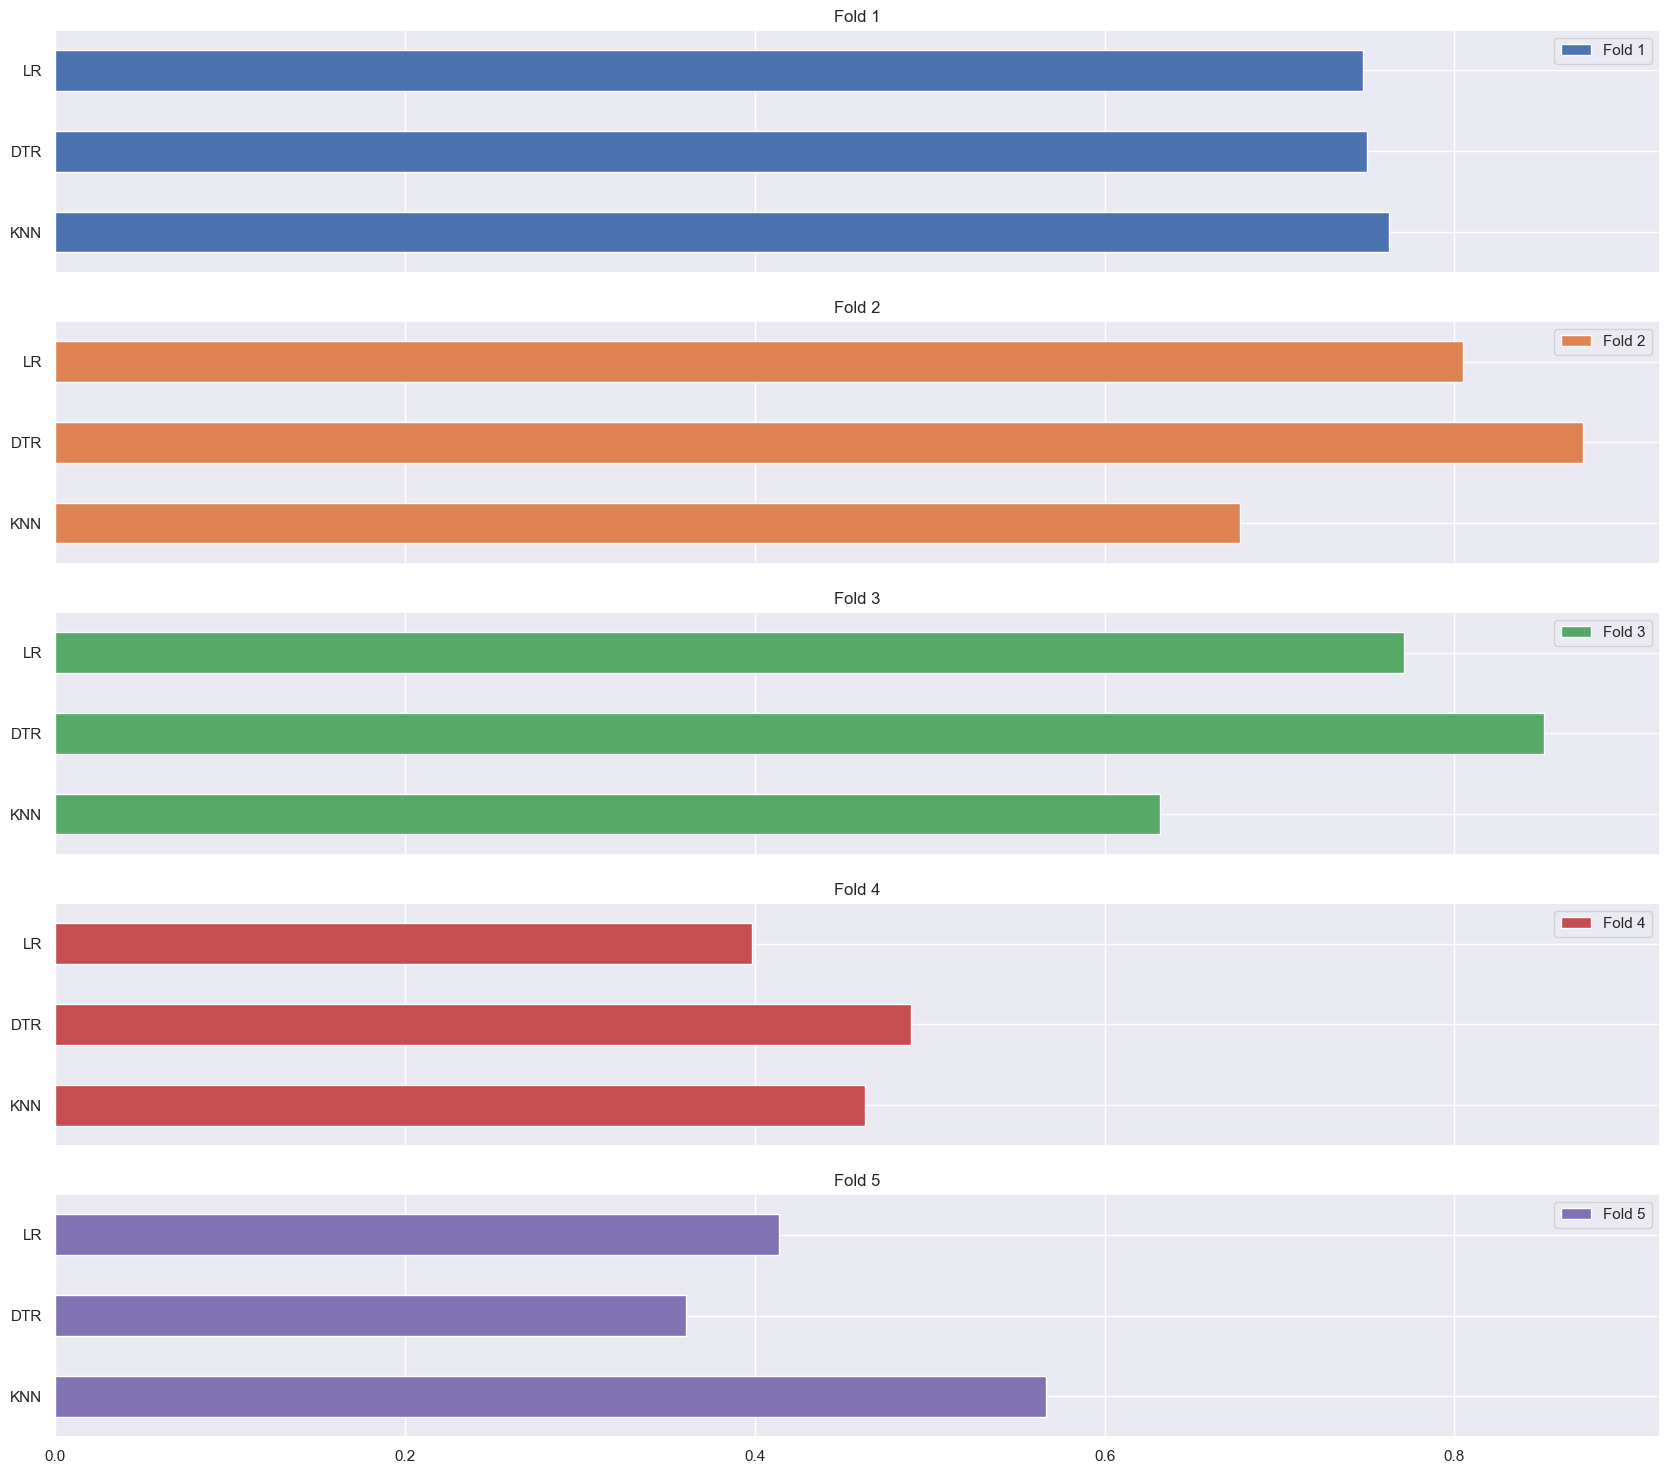

In [35]:
df2.plot.barh(subplots=True,rot=0)

In [36]:
neigh1=KNeighborsRegressor(n_neighbors=7)
neigh1.fit(X_train,y_train)
neigh1.predict(X_test)

from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
scores_knn1=[]
scores_dtr1=[]
scores_lr1=[]

for train_index,test_index in kf.split(X):
    X_train,X_test,y_train,y_test=X[train_index],X[test_index],y[train_index],y[test_index]
    scores_knn1.append(neigh1.score(X_test,y_test))
    scores_dtr1.append(dtr.score(X_test,y_test))
    scores_lr1.append(lr.score(X_test,y_test))

array([<AxesSubplot:title={'center':'Fold 1'}>,
       <AxesSubplot:title={'center':'Fold 2'}>,
       <AxesSubplot:title={'center':'Fold 3'}>,
       <AxesSubplot:title={'center':'Fold 4'}>,
       <AxesSubplot:title={'center':'Fold 5'}>], dtype=object)

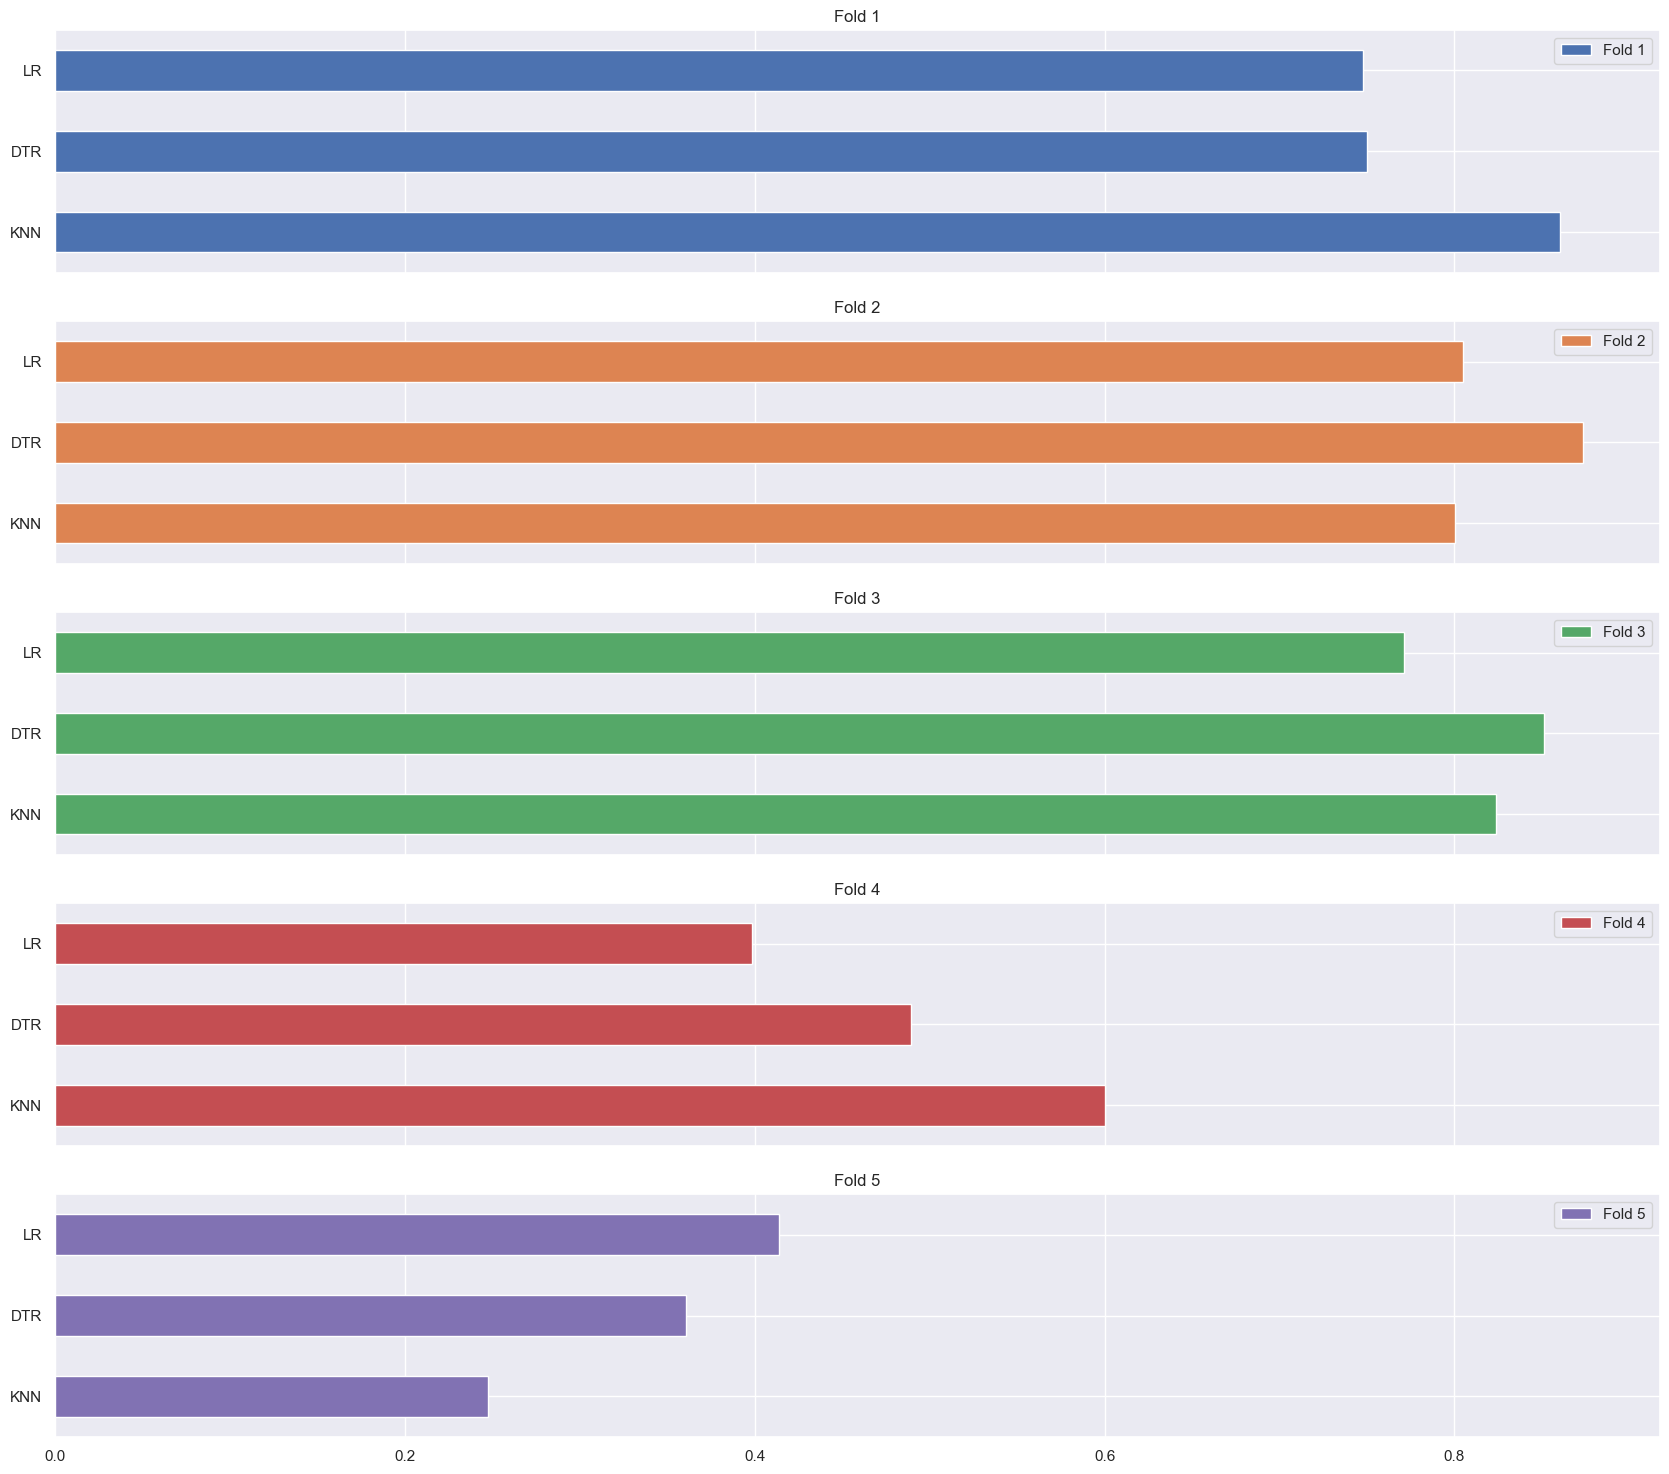

In [37]:
df3=pd.DataFrame((scores_knn1,scores_dtr1,scores_lr1),index=['KNN','DTR','LR'],columns=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5'])
df3.plot.barh(subplots=True,rot=0)